In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = pd.read_csv('data/Iris.csv')
iris_df.head(),iris_df.shape

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0   1            5.1           3.5            1.4           0.2  Iris-setosa
 1   2            4.9           3.0            1.4           0.2  Iris-setosa
 2   3            4.7           3.2            1.3           0.2  Iris-setosa
 3   4            4.6           3.1            1.5           0.2  Iris-setosa
 4   5            5.0           3.6            1.4           0.2  Iris-setosa,
 (150, 6))

# Observation
Id is of no use so drop the column<br>
150 datapoints and 6 features are there<br>
Species is the target variable

In [3]:
iris_df.drop('Id',axis=1,inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
iris_df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Observation
No null values in the dataset, but cant say the same for duplicate values

In [8]:
iris_df.duplicated().sum()

3

In [9]:
iris_df[iris_df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


# Observation
We find that there are 3 duplicate data points in the dataset, but removing them will imbalance the dataset so we proceed without removing them

# Univariate Analysis

D:\ML and DL\vittuenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

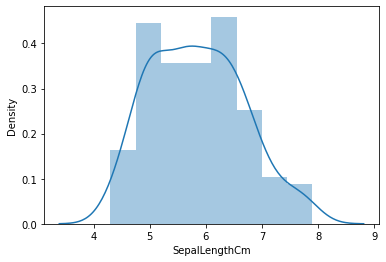

In [10]:
# Feature 1  SepalLengthCm
sns.distplot(iris_df['SepalLengthCm'],hist=True,rug=False)

We find that there is very miniscule sepration of classes but not good enough, so this parameter is not that good to predict the species

D:\ML and DL\vittuenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

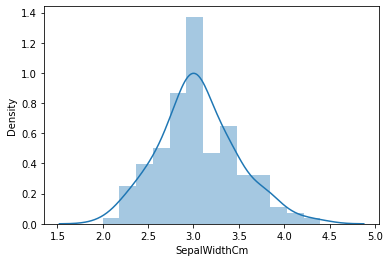

In [11]:
# Feature 2  SepalWidthCm
sns.distplot(iris_df['SepalWidthCm'],hist=True,rug=False)

This graph shows that SepalWidthCm is the worst parameter to be used to predict the Species of the flower

D:\ML and DL\vittuenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

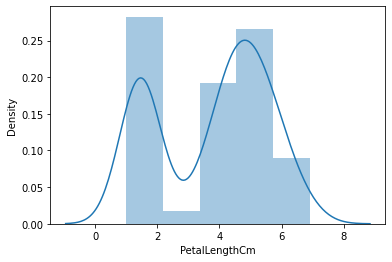

In [12]:
# Feature 3 PetalLengthCm
sns.distplot(iris_df['PetalLengthCm'],hist=True,rug=False)

From the above distplot we can say that PetalLengthCm can be used to predict atleast one of the species of the flower very easily as it has a clear separation

D:\ML and DL\vittuenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

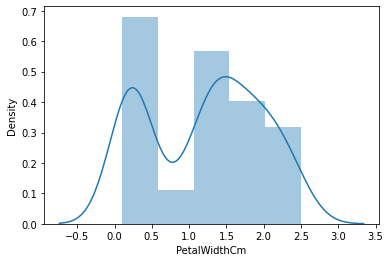

In [13]:
# Feature 4 PetalWidthCm
sns.distplot(iris_df['PetalWidthCm'],hist=True,rug=False)

From the above distplot we can say that PetalWidthhCm can be used to predict atleast one of the species of the flower easily as it has a clear separation but not as good as PetalLengthCm

D:\ML and DL\vittuenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

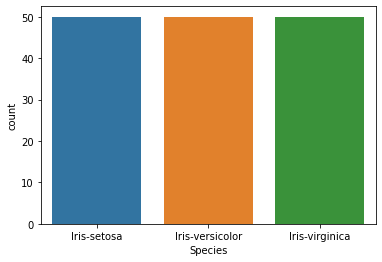

In [14]:
# Target Variable
sns.countplot(iris_df['Species'])

The above count plot shows that the target variable is a categorical variable and is a balanced dataset, with 50 datapoints belonging to each class

# BIVARIATE ANALYSIS

D:\ML and DL\vittuenv\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


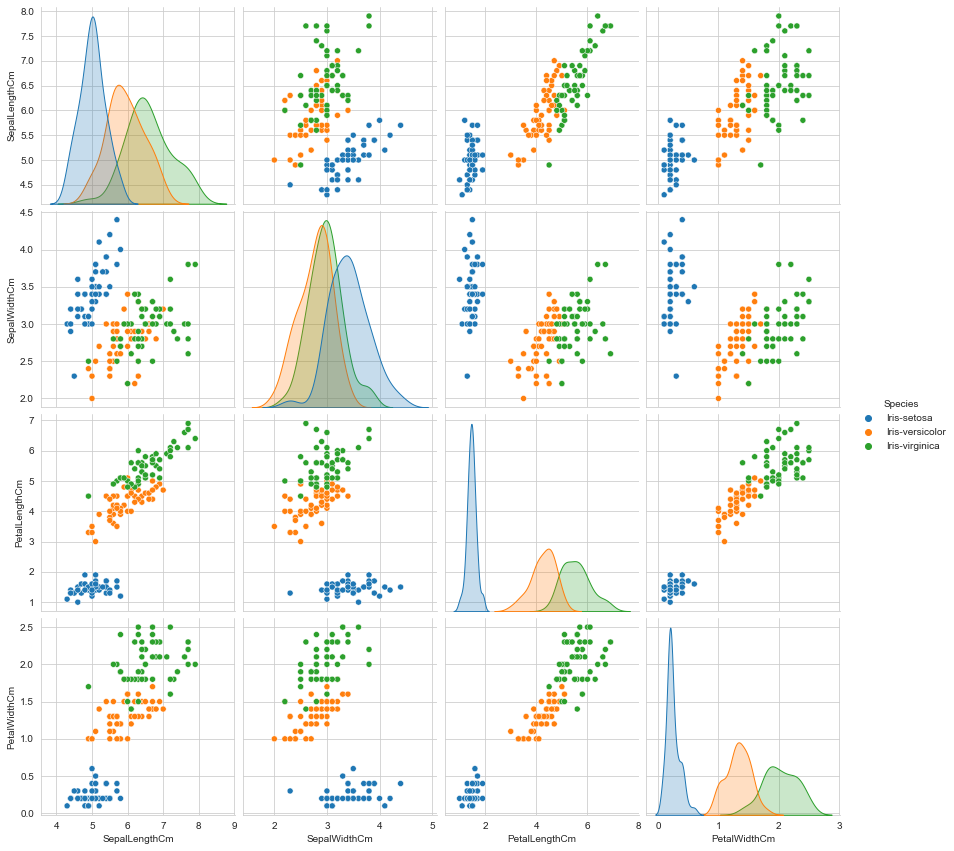

In [15]:
sns.set_style("whitegrid");
sns.pairplot(iris_df,hue="Species",size=3);
plt.show()

<AxesSubplot:>

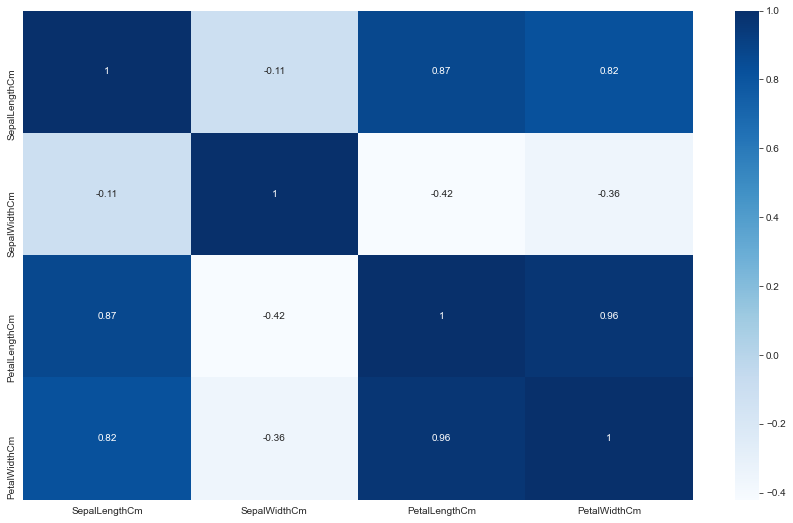

In [16]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris_df.corr(), cmap='Blues', annot = True)

# Observation
From the pair plot and heat map we find that:
1) Using PetalLengthCm and PetalWidthCm we can easily predict whether the Species is Iris-Setosa or not. <br>
2) Heat Map shows a very high correlation between PetalLengthCm and PetalWidthCm which can be used to predict the remaining two classes of the flower using a ML algorithm like Linear regression